# Can 4 output neurons classify 10 classes?

In [66]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.utils import shuffle

In [47]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

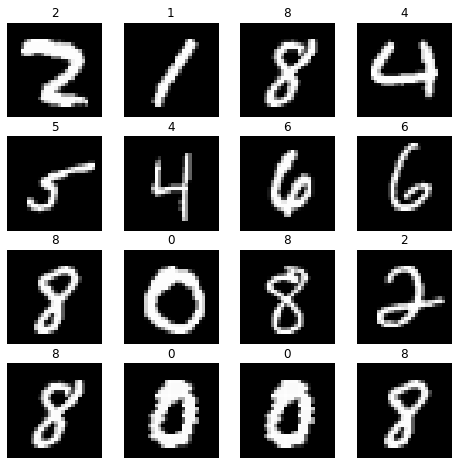

In [48]:
fig = plt.figure(figsize=(8, 8))

columns = 4
rows = 4
axes = []

# printing 16 training images
for i in range(1, columns*rows +1):
    idx = np.random.randint(1, 100)
    img = X_train[idx]
    axes.append(fig.add_subplot(rows, columns, i))
    subplot_title = y_train[idx]
    axes[-1].set_title(subplot_title)
    plt.imshow(img, interpolation='nearest', cmap=plt.get_cmap('gray'))
    plt.axis('off')
    
plt.show()

In [49]:
def decimalToBinary(n):
    # converting decimal to binary
    # and removing the prefix(0b)
    test = bin(n).replace("0b", "")
    if len(test)<4:
        test = '0'*(4-len(test))+test
    return test

cache_y_train= [decimalToBinary(num) for num in y_train]
cache_y_test = [decimalToBinary(num) for num in y_test]

def final_conversion(array):
    final = []
    for i in array:
        split = []
        for j in i:
            split.append(float(j))
        final.append(np.array(split))
    return np.array(final)

y_train_custom = final_conversion(cache_y_train)
y_test_custom = final_conversion(cache_y_test)

print(len(y_train_custom))
print(len(y_test_custom))

60000
10000


In [50]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train_baseline = np_utils.to_categorical(y_train)
y_test_baseline = np_utils.to_categorical(y_test)

In [51]:
train_size = int(X_train.shape[0] * 0.9)

train_img, valid_img = X_train[ : train_size], X_train[train_size : ]
train_label_custom, valid_label_custom = y_train_custom[ : train_size], y_train_custom[train_size : ]
train_label_baseline, valid_label_baseline = y_train_baseline[ : train_size], y_train_baseline[train_size : ]

In [52]:
train_img[0].shape

(784,)

In [53]:
def four_neuron_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [54]:
model = four_neuron_model()
# Fit the model
model.fit(train_img, train_label_custom, validation_data=(valid_img, valid_label_custom), epochs=10, batch_size=200, verbose = 2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test_custom, verbose=0)
print("\n Four Neuron model Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
270/270 - 5s - loss: 0.1659 - accuracy: 0.5403 - val_loss: 0.0780 - val_accuracy: 0.6060 - 5s/epoch - 17ms/step
Epoch 2/10
270/270 - 3s - loss: 0.0722 - accuracy: 0.5751 - val_loss: 0.0544 - val_accuracy: 0.5513 - 3s/epoch - 12ms/step
Epoch 3/10
270/270 - 3s - loss: 0.0515 - accuracy: 0.5772 - val_loss: 0.0490 - val_accuracy: 0.5908 - 3s/epoch - 13ms/step
Epoch 4/10
270/270 - 3s - loss: 0.0398 - accuracy: 0.5874 - val_loss: 0.0450 - val_accuracy: 0.5703 - 3s/epoch - 12ms/step
Epoch 5/10
270/270 - 3s - loss: 0.0320 - accuracy: 0.5923 - val_loss: 0.0404 - val_accuracy: 0.5605 - 3s/epoch - 12ms/step
Epoch 6/10
270/270 - 3s - loss: 0.0263 - accuracy: 0.5979 - val_loss: 0.0393 - val_accuracy: 0.5240 - 3s/epoch - 12ms/step
Epoch 7/10
270/270 - 3s - loss: 0.0209 - accuracy: 0.5995 - val_loss: 0.0398 - val_accuracy: 0.6043 - 3s/epoch - 12ms/step
Epoch 8/10
270/270 - 3s - loss: 0.0171 - accuracy: 0.5989 - val_loss: 0.0385 - val_accuracy: 0.5678 - 3s/epoch - 12ms/step
Epoch 9/10
270/2

In [55]:
baseline = baseline_model()
# Fit the model
baseline.fit(train_img, train_label_baseline, validation_data=(valid_img, valid_label_baseline), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = baseline.evaluate(X_test, y_test_baseline, verbose=0)
print("\n Baseline model Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
270/270 - 4s - loss: 0.2994 - accuracy: 0.9153 - val_loss: 0.1257 - val_accuracy: 0.9643 - 4s/epoch - 15ms/step
Epoch 2/10
270/270 - 3s - loss: 0.1201 - accuracy: 0.9656 - val_loss: 0.0904 - val_accuracy: 0.9745 - 3s/epoch - 12ms/step
Epoch 3/10
270/270 - 3s - loss: 0.0761 - accuracy: 0.9781 - val_loss: 0.0754 - val_accuracy: 0.9788 - 3s/epoch - 12ms/step
Epoch 4/10
270/270 - 3s - loss: 0.0537 - accuracy: 0.9844 - val_loss: 0.0703 - val_accuracy: 0.9778 - 3s/epoch - 12ms/step
Epoch 5/10
270/270 - 3s - loss: 0.0381 - accuracy: 0.9891 - val_loss: 0.0677 - val_accuracy: 0.9782 - 3s/epoch - 12ms/step
Epoch 6/10
270/270 - 3s - loss: 0.0283 - accuracy: 0.9921 - val_loss: 0.0655 - val_accuracy: 0.9820 - 3s/epoch - 12ms/step
Epoch 7/10
270/270 - 3s - loss: 0.0203 - accuracy: 0.9952 - val_loss: 0.0627 - val_accuracy: 0.9820 - 3s/epoch - 12ms/step
Epoch 8/10
270/270 - 3s - loss: 0.0145 - accuracy: 0.9971 - val_loss: 0.0613 - val_accuracy: 0.9822 - 3s/epoch - 12ms/step
Epoch 9/10
270/2

In [56]:
def decode(array):
    final = ''
    for i in array:
        final+=str(int(i))
    return int(final,2)

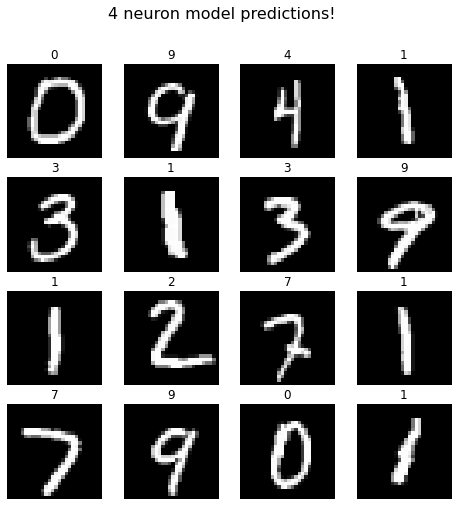

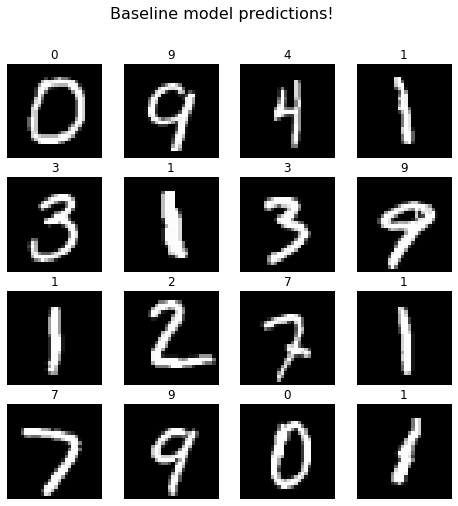

In [58]:
fig = plt.figure(figsize=(8, 8))

columns = 4
rows = 4
axes = []

np.random.seed(10)
# printing 16 training images
for i in range(1, columns*rows +1):
    idx = np.random.randint(1, 100)
    img = X_test[idx]
    img1 = img.reshape(28,28)
    img_tensor = np.expand_dims(img, axis=0)
    axes.append(fig.add_subplot(rows, columns, i))
    subplot_title = decode(np.round(model.predict(img_tensor)[0]))
    axes[-1].set_title(subplot_title)
    plt.imshow(img1, interpolation='nearest', cmap=plt.get_cmap('gray'))
    plt.axis('off')
    
fig.suptitle('4 neuron model predictions!', fontsize = 16)    
plt.show()

fig2 = plt.figure(figsize=(8, 8))

columns2 = 4
rows2 = 4
axes2 = []

print("\n")
np.random.seed(10)
# printing 16 training images
for i in range(1, columns2*rows2 +1):
    idx = np.random.randint(1, 100)
    img = X_test[idx]
    img1 = img.reshape(28,28)
    img_tensor = np.expand_dims(img, axis=0)
    axes.append(fig2.add_subplot(rows, columns, i))
    subplot_title = np.argmax(baseline.predict(img_tensor))
    axes[-1].set_title(subplot_title)
    plt.imshow(img1, interpolation='nearest', cmap=plt.get_cmap('gray'))
    plt.axis('off')

fig2.suptitle('Baseline model predictions!', fontsize = 16) 
plt.show()

In [61]:
#Loading MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Loading Fashion MNIST dataset
(X_train1, y_train1), (X_test1, y_test1) = fashion_mnist.load_data()

In [62]:
fashion_x_train = []
fashion_y_train = []

for i in range(len(y_train1)):
    if y_train1[i] in [0,1,2,3,4,5]:
        fashion_x_train.append(X_train1[i])
        fashion_y_train.append(y_train1[i]+10)
        
fashion_x_train = np.array(fashion_x_train)
fashion_y_train = np.array(fashion_y_train)

print(fashion_x_train.shape)
print(fashion_y_train.shape)

(36000, 28, 28)
(36000,)


In [63]:
fashion_x_test = []
fashion_y_test = []

for i in range(len(y_test1)):
    if y_test1[i] in [0,1,2,3,4,5]:
        fashion_x_test.append(X_test1[i])
        fashion_y_test.append(y_test1[i]+10)
        
fashion_x_test = np.array(fashion_x_test)
fashion_y_test = np.array(fashion_y_test)

print(fashion_x_test.shape)
print(fashion_y_test.shape)

(6000, 28, 28)
(6000,)


In [64]:
train_array_x = np.concatenate((X_train, fashion_x_train), axis = 0)
train_array_y = np.concatenate((y_train, fashion_y_train), axis = 0)

test_array_x = np.concatenate((X_test, fashion_x_test), axis = 0)
test_array_y = np.concatenate((y_test, fashion_y_test), axis = 0)

final_dict = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9,
              10: 'T-Shirt',11: 'Trouser', 12: 'Pullover', 13: 'Dress', 14: 'Coat', 15: 'Sandal'}

In [67]:
train_array_x, train_array_y = shuffle(train_array_x, train_array_y, random_state=0)
test_array_x, test_array_y = shuffle(test_array_x, test_array_y, random_state=0)

In [68]:
len(train_array_x)

96000

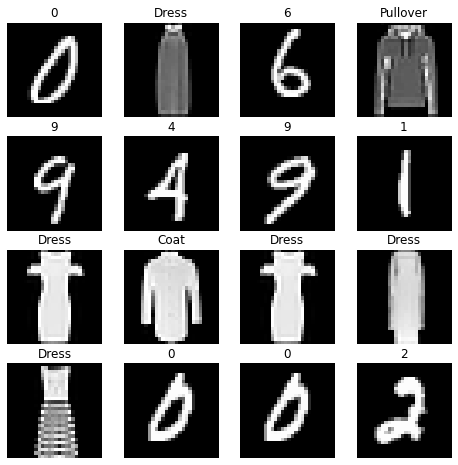

In [70]:
fig = plt.figure(figsize=(8, 8))

columns = 4
rows = 4
axes = []

# printing 16 training images
for i in range(1, columns*rows +1):
    idx = np.random.randint(1,100 )
    img = train_array_x[idx]
    axes.append(fig.add_subplot(rows, columns, i))
    subplot_title = final_dict[train_array_y[idx]]
    axes[-1].set_title(subplot_title)
    plt.imshow(img, interpolation='nearest', cmap=plt.get_cmap('gray'))
    plt.axis('off')
    
plt.show()

In [71]:
def decimalToBinary(n):
    # converting decimal to binary
    # and removing the prefix(0b)
    test = bin(n).replace("0b", "")
    if len(test)<4:
        test = '0'*(4-len(test))+test
    return test

cache_y_train= [decimalToBinary(num) for num in train_array_y]
cache_y_test = [decimalToBinary(num) for num in test_array_y]

def final_conversion(array):
    final = []
    for i in array:
        split = []
        for j in i:
            split.append(float(j))
        final.append(np.array(split))
    return np.array(final)

In [72]:
num_pixels = train_array_x.shape[1] * train_array_x.shape[2]

train_array_x = train_array_x.reshape((train_array_x.shape[0], num_pixels)).astype('float32')
test_array_x = test_array_x.reshape((test_array_x.shape[0], num_pixels)).astype('float32')

train_array_x = train_array_x / 255
test_array_x = test_array_x / 255

# one hot encode outputs
y_train_baseline = np_utils.to_categorical(train_array_y)
y_test_baseline = np_utils.to_categorical(test_array_y)

y_train_custom = final_conversion(cache_y_train)
y_test_custom = final_conversion(cache_y_test)

print(len(y_train_custom))
print(len(y_test_custom))

96000
16000


In [73]:
train_size = int(train_array_x.shape[0] * 0.9)

train_img, valid_img = train_array_x[ : train_size], train_array_x[train_size : ]
train_label_custom, valid_label_custom = y_train_custom[ : train_size], y_train_custom[train_size : ]
train_label_baseline, valid_label_baseline = y_train_baseline[ : train_size], y_train_baseline[train_size : ]

In [74]:
train_img[0].shape

(784,)

In [75]:
def four_neuron_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [79]:
import time
start_time = time.time()

model = four_neuron_model()
# Fit the model
history_four_nuerons = model.fit(train_img, train_label_custom, validation_data=(valid_img, valid_label_custom), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(test_array_x, y_test_custom, verbose=0)
print("\nFour Neuron model Error: %.2f%%" % (100-scores[1]*100))
end_time = time.time()

print("Time taken for training: {} seconds".format(round(end_time-start_time,2)))

Epoch 1/10
432/432 - 6s - loss: 0.1574 - accuracy: 0.6735 - val_loss: 0.0961 - val_accuracy: 0.6970 - 6s/epoch - 14ms/step
Epoch 2/10
432/432 - 5s - loss: 0.0827 - accuracy: 0.7086 - val_loss: 0.0813 - val_accuracy: 0.7079 - 5s/epoch - 11ms/step
Epoch 3/10
432/432 - 5s - loss: 0.0658 - accuracy: 0.7104 - val_loss: 0.0675 - val_accuracy: 0.7464 - 5s/epoch - 11ms/step
Epoch 4/10
432/432 - 5s - loss: 0.0558 - accuracy: 0.7142 - val_loss: 0.0660 - val_accuracy: 0.7314 - 5s/epoch - 11ms/step
Epoch 5/10
432/432 - 5s - loss: 0.0492 - accuracy: 0.7157 - val_loss: 0.0617 - val_accuracy: 0.7223 - 5s/epoch - 11ms/step
Epoch 6/10
432/432 - 5s - loss: 0.0436 - accuracy: 0.7133 - val_loss: 0.0585 - val_accuracy: 0.6890 - 5s/epoch - 11ms/step
Epoch 7/10
432/432 - 5s - loss: 0.0386 - accuracy: 0.7160 - val_loss: 0.0588 - val_accuracy: 0.6918 - 5s/epoch - 12ms/step
Epoch 8/10
432/432 - 5s - loss: 0.0351 - accuracy: 0.7184 - val_loss: 0.0549 - val_accuracy: 0.7146 - 5s/epoch - 11ms/step
Epoch 9/10
432/4

In [80]:
import time
start_time = time.time()

baseline = baseline_model()
# Fit the model
history_baseline = baseline.fit(train_img, train_label_baseline, validation_data=(valid_img, valid_label_baseline), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = baseline.evaluate(test_array_x, y_test_baseline, verbose=0)
print("\nBaseline model Error: %.2f%%" % (100-scores[1]*100))
end_time = time.time()

print("Time taken for training: ", round(end_time-start_time,2))

Epoch 1/10
432/432 - 6s - loss: 0.3319 - accuracy: 0.8994 - val_loss: 0.2130 - val_accuracy: 0.9304 - 6s/epoch - 13ms/step
Epoch 2/10
432/432 - 5s - loss: 0.1752 - accuracy: 0.9433 - val_loss: 0.1557 - val_accuracy: 0.9481 - 5s/epoch - 12ms/step
Epoch 3/10
432/432 - 5s - loss: 0.1340 - accuracy: 0.9563 - val_loss: 0.1466 - val_accuracy: 0.9497 - 5s/epoch - 12ms/step
Epoch 4/10
432/432 - 5s - loss: 0.1159 - accuracy: 0.9607 - val_loss: 0.1304 - val_accuracy: 0.9579 - 5s/epoch - 12ms/step
Epoch 5/10
432/432 - 5s - loss: 0.0998 - accuracy: 0.9657 - val_loss: 0.1222 - val_accuracy: 0.9594 - 5s/epoch - 11ms/step
Epoch 6/10
432/432 - 5s - loss: 0.0870 - accuracy: 0.9702 - val_loss: 0.1272 - val_accuracy: 0.9581 - 5s/epoch - 12ms/step
Epoch 7/10
432/432 - 5s - loss: 0.0816 - accuracy: 0.9714 - val_loss: 0.1242 - val_accuracy: 0.9590 - 5s/epoch - 11ms/step
Epoch 8/10
432/432 - 5s - loss: 0.0739 - accuracy: 0.9744 - val_loss: 0.1228 - val_accuracy: 0.9616 - 5s/epoch - 11ms/step
Epoch 9/10
432/4

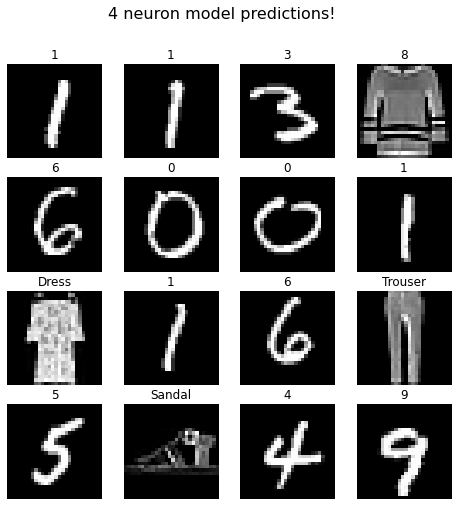

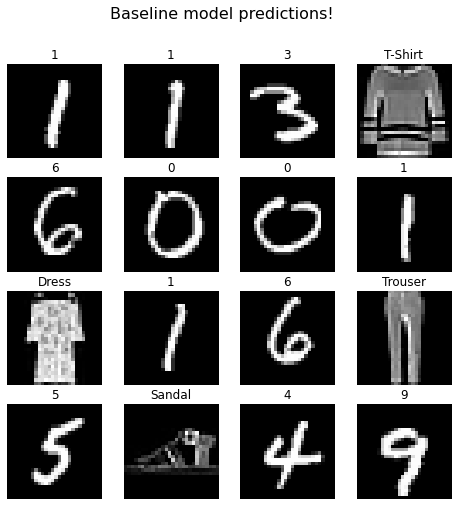

In [81]:
fig = plt.figure(figsize=(8, 8))

columns = 4
rows = 4
axes = []

np.random.seed(10)
# printing 16 training images
for i in range(1, columns*rows +1):
    
    idx = np.random.randint(1, 100)
    img = test_array_x[idx]
    img1 = img.reshape(28,28)
    img_tensor = np.expand_dims(img, axis=0)
    axes.append(fig.add_subplot(rows, columns, i))
    subplot_title = final_dict[decode(np.round(model.predict(img_tensor)[0]))]
    axes[-1].set_title(subplot_title)
    plt.imshow(img1, interpolation='nearest', cmap=plt.get_cmap('gray'))
    plt.axis('off')
    
fig.suptitle('4 neuron model predictions!', fontsize = 16)    
plt.show()

fig2 = plt.figure(figsize=(8, 8))

columns2 = 4
rows2 = 4
axes2 = []

print("\n")

# printing 16 training images
np.random.seed(10)
for i in range(1, columns2*rows2 +1):
    idx = np.random.randint(1, 100)
    img = test_array_x[idx]
    img1 = img.reshape(28,28)
    img_tensor = np.expand_dims(img, axis=0)
    axes.append(fig2.add_subplot(rows, columns, i))
    subplot_title = final_dict[np.argmax(baseline.predict(img_tensor))]
    axes[-1].set_title(subplot_title)
    plt.imshow(img1, interpolation='nearest', cmap=plt.get_cmap('gray'))
    plt.axis('off')

fig2.suptitle('Baseline model predictions!', fontsize = 16) 
plt.show()

1000
1000




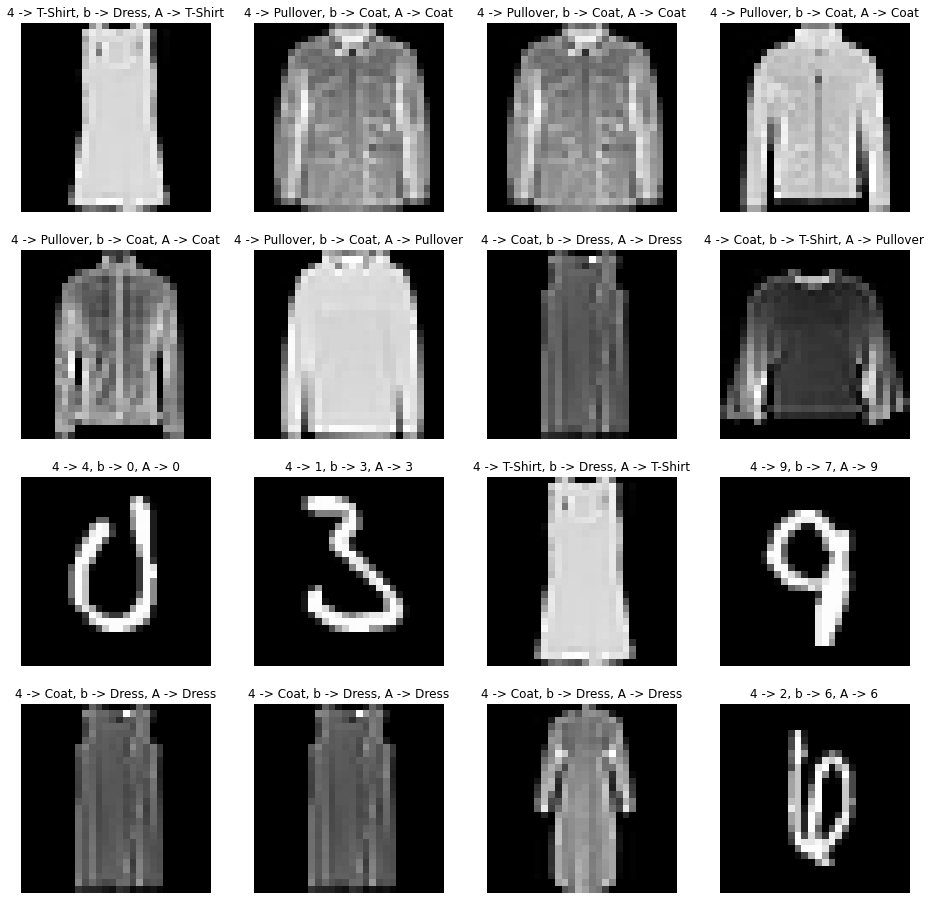

In [82]:
test_array_short = test_array_x[:1000]
y_test_short = test_array_y[:1000]

model_predictions = model.predict(test_array_short)
baseline_predictions = baseline.predict(test_array_short)

model_predictions = np.array([final_dict[decode(np.round(i))] for i in model_predictions])
baseline_predictions = np.array([final_dict[np.argmax(i)] for i in baseline_predictions])

print(len(model_predictions))
print(len(baseline_predictions))

bool_array = model_predictions==baseline_predictions
final = np.argwhere(bool_array==False)

import random

fig2 = plt.figure(figsize=(16, 16))

columns2 = 4
rows2 = 4
axes2 = []

print("\n")

# printing 16 training images
np.random.seed(10)
for i in range(1, columns2*rows2 +1):
    idx = random.sample(list(final),1)[0][0]
    img = test_array_short[idx]
    img1 = img.reshape(28,28)
    img_tensor = np.expand_dims(img, axis=0)
    axes.append(fig2.add_subplot(rows, columns, i))
    subplot_title = "4 -> {}, b -> {}, A -> {}".format(model_predictions[idx], baseline_predictions[idx], final_dict[test_array_y[idx]])
    axes[-1].set_title(subplot_title)
    plt.imshow(img1, interpolation='nearest', cmap=plt.get_cmap('gray'))
    plt.axis('off')
    
plt.show()

In [ ]:
#Thanks